In [13]:
import pickle
from MARSModel import MARSModel

with open("model_1.pickle", "rb") as infile:
        err, model = pickle.load(infile)
        m1 = MARSModel()
        m1.components = model
        print(err)

with open("model_2.pickle", "rb") as infile:
        err, model = pickle.load(infile)
        m2 = MARSModel()
        m2.components = model
        print(err)

models = [m1, m2]


6.120441508710352
14.36462124915862


In [1]:
import sys
import string

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from MARS import runMARSForward, runMARSBackward

import logging
import pickle

from MARSModel import MARSModel
import statsmodels.api as sm

def gen_labels(n):
    alphabet_string = string.ascii_lowercase
    alphabet_list = list(alphabet_string)
    return alphabet_list[:n]

def computePrediction(X_test, model):
    y_pred = []
    for i in range(len(X_test)):
        obs = X_test[i]
        dic = {i: obs[i] for i in range(len(obs))}
        v = 0
        for c in model.components:
            hinge_values = {v: dic[v] for v in c.func.getVariables()}
            v += c.eval(hinge_values)
        y_pred.append(v)
    return y_pred

df = pd.read_json('dataset.json')
X = df['X'].to_numpy()
y = df['y'].to_numpy()
X = np.array(list(map(np.array, X)))
n = len(X[0])
X = X[:500]
y = y[:500]
labels = gen_labels(n)

rkf = KFold(n_splits=2, shuffle=True, random_state=2652124)
i = 0
modelsasgenerated = []
for train_index, test_index in rkf.split(X):
    if (i > 0):
        continue
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model, ssr = runMARSForward(X_train, y_train,labels, n, maxSplits=7)
    bmodel = runMARSBackward(model, ssr, X_train, y_train, len(X_train), maxSplits=7)

    err = mean_absolute_error(y_test, computePrediction(X_test, bmodel))
    modelsasgenerated.append((model, bmodel, err))
    print(model)
    print(bmodel)
    i += 1


12.242883726115807
1.0 + 94.64116969758382max(0,d - 0.008260637000000001) + 248.81965875007742max(0,0.008260637000000001 - d) - 85.38092944980231max(0,d - 0.08934500070000001) + 68.87519921539153max(0,0.08934500070000001 - d) + 6.113623572381007max(0,b - 0.1516467453) - 26.27217696043753max(0,0.1516467453 - b) 
1.0 + 94.64116969758382max(0,d - 0.008260637000000001) + 248.81965875007742max(0,0.008260637000000001 - d) - 85.38092944980231max(0,d - 0.08934500070000001) + 68.87519921539153max(0,0.08934500070000001 - d) + 6.113623572381007max(0,b - 0.1516467453) - 26.27217696043753max(0,0.1516467453 - b) 


In [2]:
print(modelsasgenerated[0][0].length())
print(modelsasgenerated[0][1].length())

7
7


In [3]:
i = 0
errorstrain = []
errorstest = []
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    err = mean_absolute_error(y_test, computePrediction(X_test, modelsasgenerated[0][1]))
    errs = mean_absolute_error(y_train, computePrediction(X_train, modelsasgenerated[0][1]))
    errorstrain.append(errs)
    errorstest.append(err)
    i+=1

ValueError: shape mismatch: objects cannot be broadcast to a single shape

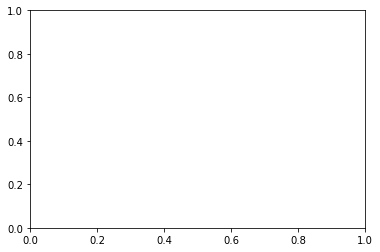

In [4]:
import matplotlib.pyplot as plt

br1 = np.arange(4)
br2 = [x + 0.4 for x in br1]

plt.bar(br1, errorstest, width=0.4, edgecolor='grey',label='Test error')
plt.bar(br2, errorstrain, width=0.4, edgecolor='gray', label='Train error') 
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.xticks([r + 0.25 for r in range(4)],
        ['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.legend(loc='lower right')    
plt.show()      

In [30]:
sampleind = np.random.choice(X.shape[0], 25, replace=False)
sample = X
preds = []
for b in modelsasgenerated:
    m = b[1]
    pred = computePrediction(sample, m)
    pred = np.reshape(pred, (-1,1))
    pred = np.rot90(pred)
    break

print(pred.flatten())
print(y)
print

[129.63414338  89.17714269  27.98741615 155.08996589 123.76816557
 148.29022396  52.13523884  17.68925966  10.07593535  70.62734085
  89.3188554    9.24667959  70.22897034 131.90497921  72.16041686
   7.63233466 169.79137503  11.47612586 107.03929449 118.80601951
 138.90647576  20.98270481 100.20688127 173.8760208  110.29887509
  56.77301662  12.80584631  21.35158832 134.12672641  18.20014808
   9.1069199  110.49526991  57.83176527  49.7890315  142.75340366
  51.26339181 172.2370075    8.82651174  95.52531058  96.37657724
   8.43894459  95.83102987 147.24678018 151.09894118 137.02461283
  11.57065912 131.5065937  161.93227294 146.08615644  62.30490444
 125.51162475  24.76612757  47.60072744  39.83244696  78.22113673
  89.94694553 124.34612149  84.11270961  36.12693117 129.62461541
  87.9202288   91.31986687  46.79732514 145.48051091 154.49151808
  59.42488758   9.51897362 127.79803737  41.89513346 172.24128
  53.5055419  101.33005661 161.57355922  60.15280083 119.18996007
  78.42390851

<function print>

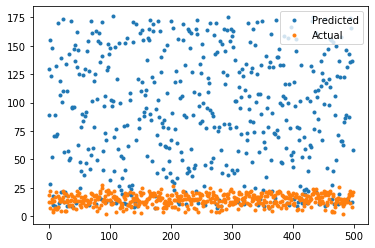

In [31]:
ysamp = y
plt.plot(pred.flatten(), '.', label='Predicted')
plt.plot(ysamp, '.', label='Actual')
plt.legend()

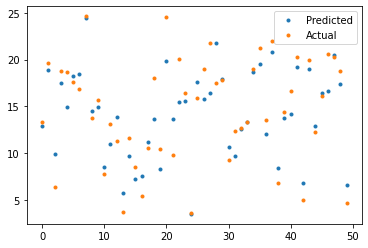

In [121]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression().fit(X, y)
lgpred = lg.predict(sample)
plt.plot(lgpred, '.', label='Predicted')
plt.plot(ysamp, '.', label='Actual')
plt.legend()

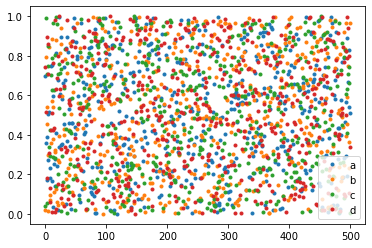

In [109]:
plt.plot(X[:,0], '.', label='a')
plt.plot(X[:,1], '.', label='b')
plt.plot(X[:,2], '.', label='c')
plt.plot(X[:,3], '.', label='d')
plt.legend()

In [ ]:
import seaborn as sns
sns.set_theme(style='whitegrid')
df = pd.DataFrame()


In [3]:
with open("model_2.pickle", "wb") as outfile:
    # "wb" argument opens the file in binary mode
    pickle.dump([models[1][0], models[1][1].components], outfile)

In [1]:
import sys
import string

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from MARS import runMARSForward, runMARSBackward

import logging
import pickle

from MARSModel import MARSModel

def gen_labels(n):
    alphabet_string = string.ascii_lowercase
    alphabet_list = list(alphabet_string)
    return alphabet_list[:n]

def computePrediction(X_test, model):
    y_pred = []
    for i in range(len(X_test)):
        obs = X_test[i]
        dic = {i: obs[i] for i in range(len(obs))}
        v = 0
        for c in model.components:
            hinge_values = {v: dic[v] for v in c.func.getVariables()}
            v += c.eval(hinge_values)
        y_pred.append(v)
    return y_pred

df = pd.read_json('ccpp.json')
X = df[['AT', 'V', 'AP', 'RH']].to_numpy()
y = df['PE'].to_numpy()
X = np.array(list(map(np.array, X)))
n = len(X[0])
X = X[:1000]
y = y[:1000]
labels = gen_labels(n)

rkf = KFold(n_splits=4, shuffle=True, random_state=2652124)
models = []
model = None
bmodel = None
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model, ssr = runMARSForward(X_train, y_train, labels, n, maxSplits=14)
    bmodel = runMARSBackward(model, ssr, X_train, y_train, len(X_train), maxSplits=14)
    err = mean_absolute_error(y_test, computePrediction(X_test, bmodel))
    models.append((err, model, bmodel))
    model = None
    bmodel = None

print(models)


In [37]:
sampleind = np.random.choice(X.shape[0], 25, replace=False)
sample = X[sampleind, :]
ysamp = y[sampleind] + y.mean()
print(models[0][1])
pred = computePrediction(sample, models[0][1])

1.0 - 0.024813694987764076max(0,d - 0.008260637000000001) - .08875110180812934max(0,0.008260637000000001 - d) - .0052997802285444096max(0,d - 0.08934500070000001) + 0.8727409000997585max(0,0.08934500070000001 - d) - .07763380255755958max(0,b - 0.1516467453) - 0.15402911788866766max(0,0.1516467453 - b) 1.0 - 0.8687075988810662max(0,a - -2.1081902213) - 2.4180053739708427max(0,-2.1081902213 - a) - 3.6548850031969407max(0,d - 1.7582568229) - 0.8994962871130705max(0,1.7582568229 - d) + 0.24420296909467426max(0,d - 0.008260637000000001)max(0,b - 0.9969222362000001) - 0.023244981917256796max(0,d - 0.008260637000000001)max(0,0.9969222362000001 - b) + 0.46436828604592095max(0,b - 0.1516467453)max(0,a - 1.325569178) - 0.2753916300564294max(0,b - 0.1516467453)max(0,1.325569178 - a) - 13.25243662626206max(0,c - 3.3661643214) - .052920618896381166max(0,3.3661643214 - c) - 0.22083694008246188max(0,0.08934500070000001 - d)max(0,b - 0.8808258010000001) - .14218541444837376max(0,0.08934500070000001 - 

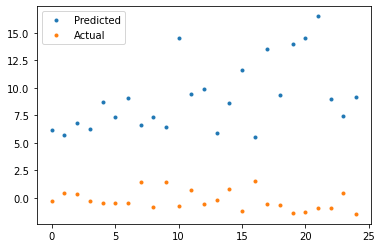

In [36]:
plt.plot(pred, '.', label='Predicted')
plt.plot(ysamp, '.', label='Actual')
plt.legend()

6.120441508710352


TypeError: __str__ returned non-string (type float)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

df = pd.DataFrame()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = y

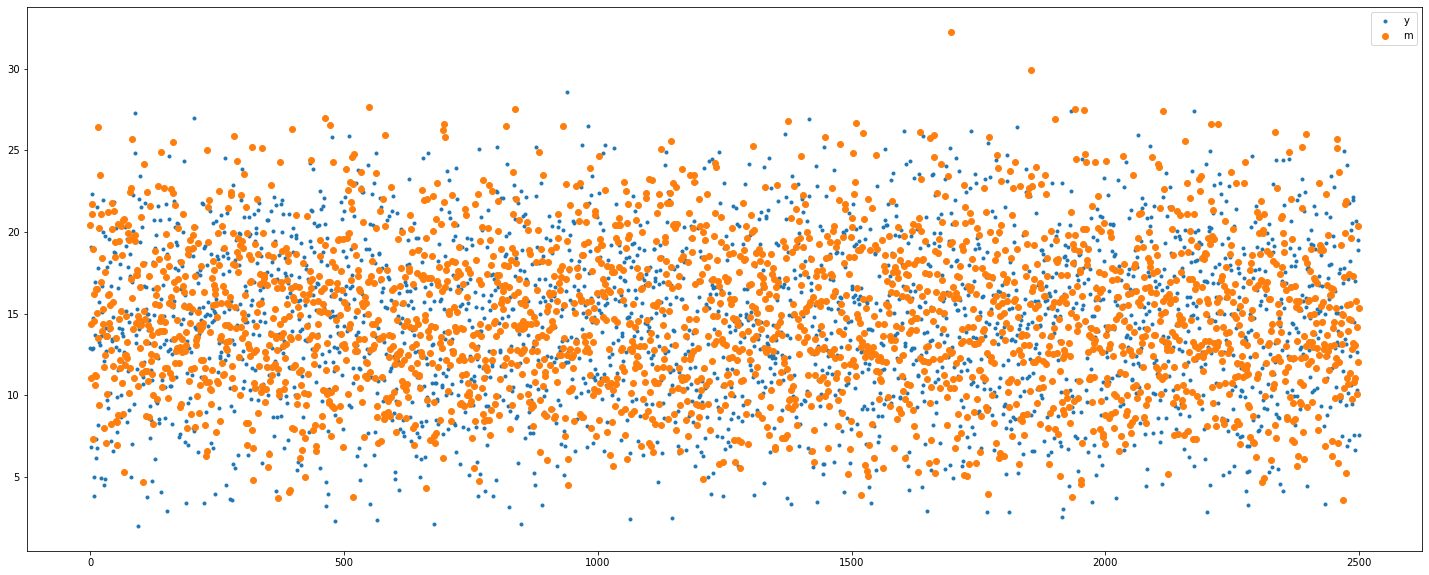

In [4]:
newmodelv = []
oldmodelv = []
for i in range(len(X)):
    obs = X[i]
    dic = {i: obs[i] for i in range(len(obs))}
    v = 0
    for c in newmodel.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        v += c.eval(hinge_values)
    newmodelv.append(v)
    d = 0
    for c in old.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        e = c.eval(hinge_values)
        d += e
    oldmodelv.append(d)

plt.figure(figsize=(25,10))
plt.plot(y, '.', label='y')
plt.plot(newmodelv, 'o', label='m')
plt.legend()

In [90]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, newmodelv)

4.486066308085652